<a href="https://colab.research.google.com/github/leynessa/ds_projects/blob/main/Horse__survuval_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Horse Survival in Colic cases prediction**

#**Introduction**

**Project Objective: Predicting Horse´s Survival using Data Mining**

The main objective of this project is to explore the Horse Colic dataset obtained from UC Irvine and identify the most influential feature in predicting the survival of horses affected by colic. The dataset contains a diverse range of features, including both categorical and numerical variables, with continuous and discrete numerical values. Each row represents a distinct colic case in a horse, and the outcome, such as whether the horse lived, died, or was euthanized.
After performing data cleansing, we used data mining techniques to uncover valuable patterns and insights from the dataset.

**Motivation:**
This project serves two primary motivations:

1. **Academic Requirement:** The project is my final project  for the Data Mining discipline at PUC-Rio's MBA BI-Master in Data Science and Artificial Intelligence.

2. **Demonstration of Skills:** By conducting exploratory data analysis, implementing data cleansing, and applying data mining techniques, this project demonstrates my proficiency in handling real-world datasets and extracting meaningful information to aid in decision-making.


The original dataset can be found at: http://archive.ics.uci.edu/ml/datasets/Horse+Colic


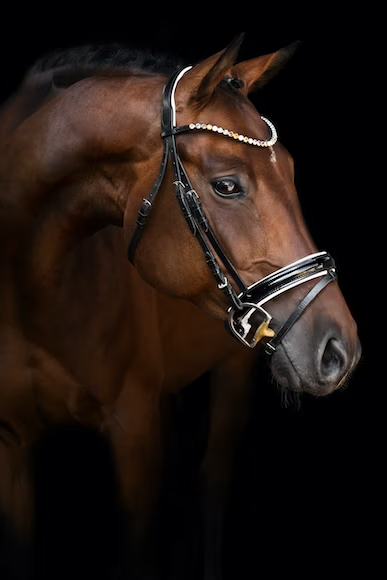

#  **The Problem Statement**

Determine if the horse lived, died, or was euthanized

#**Exploratory Data Analysis(EDA)**

---



In [88]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree


#read csv
df_train = pd.read_csv("horse.csv")
df_train.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [89]:
df_test = pd.read_csv("horseTest.csv")
df_test.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,...,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,...,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,...,37.0,6.1,clear,NaN,died,no,0,0,0,yes
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,...,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes


In [90]:
df_train.shape

(299, 28)

In [5]:
df_test.shape

(89, 28)

In [6]:

df_train.columns # see the features of the dataset

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')



---


Check the different values for non numerical data:

In [ ]:
print(df_train.outcome.unique().tolist()) #check the types of outcome to ensure there is only 3

['died', 'euthanized', 'lived']


In [ ]:
lis1= df_train['surgery']. nunique()
lis1
print(df_train.surgery.unique().tolist()) #checking the different answer for non numeric values

['no', 'yes']


In [ ]:
lis2= df_train['lesion_1']. nunique()
lis2
print(df_train.lesion_1.unique().tolist())

[11300, 2208, 0, 4300, 3124, 3205, 2124, 2111, 4124, 2112, 3207, 1400, 4205, 3111, 4122, 2207, 2209, 1124, 7111, 5205, 2113, 9400, 2305, 7209, 7400, 3112, 3209, 2322, 11124, 3025, 2205, 5206, 400, 5000, 5400, 31110, 2206, 5124, 7113, 6209, 3400, 6112, 6111, 1111, 2300, 21110, 4111, 3133, 5111, 300, 3115, 9000, 3300, 3113, 41110, 11400, 12208, 4206, 4207, 8300, 8400]


In [ ]:
lis3= df_train['lesion_2']. nunique()
lis3
print(df_train.lesion_2.unique().tolist())

[0, 1400, 7111, 3111, 6112, 3112]


In [ ]:
lis4= df_train['lesion_3']. nunique()
lis4
print(df_train.lesion_3.unique().tolist())

[0, 2209]


Checking the number of columns, column labels, column data types, and missing values:

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [8]:
{column: list(df_train[column].unique()) for column in df_train.select_dtypes('object').columns}

{'surgery': ['no', 'yes'],
 'age': ['adult', 'young'],
 'temp_of_extremities': ['cool', nan, 'normal', 'cold', 'warm'],
 'peripheral_pulse': ['reduced', nan, 'normal', 'absent', 'increased'],
 'mucous_membrane': [nan,
  'pale_cyanotic',
  'pale_pink',
  'dark_cyanotic',
  'normal_pink',
  'bright_red',
  'bright_pink'],
 'capillary_refill_time': ['more_3_sec', 'less_3_sec', nan, '3'],
 'pain': ['extreme_pain',
  'mild_pain',
  'depressed',
  nan,
  'severe_pain',
  'alert'],
 'peristalsis': ['absent', 'hypomotile', nan, 'hypermotile', 'normal'],
 'abdominal_distention': ['severe', 'slight', 'none', nan, 'moderate'],
 'nasogastric_tube': [nan, 'none', 'slight', 'significant'],
 'nasogastric_reflux': [nan, 'less_1_liter', 'none', 'more_1_liter'],
 'rectal_exam_feces': ['decreased', 'absent', 'normal', nan, 'increased'],
 'abdomen': ['distend_large', 'other', 'normal', nan, 'firm', 'distend_small'],
 'abdomo_appearance': [nan, 'cloudy', 'serosanguious', 'clear'],
 'outcome': ['died', 'eut

Checking to see if the target is Balanced

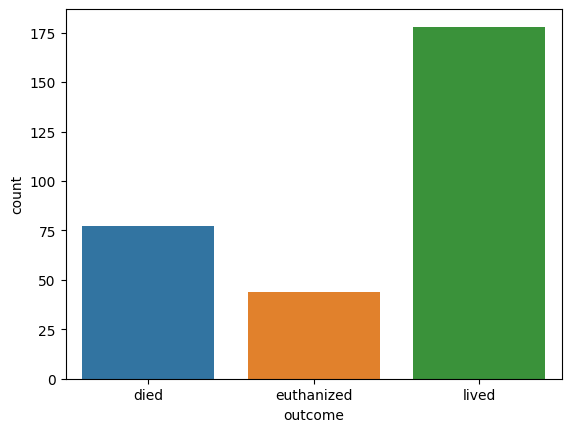

In [9]:
#is the target balanced?
sns.countplot(data=df_train, x='outcome');

Well lived has almost double the results of died/euthanized

<ipython-input-11-8f6ed15521fb>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_train.hist(bins=50, ax=ax)


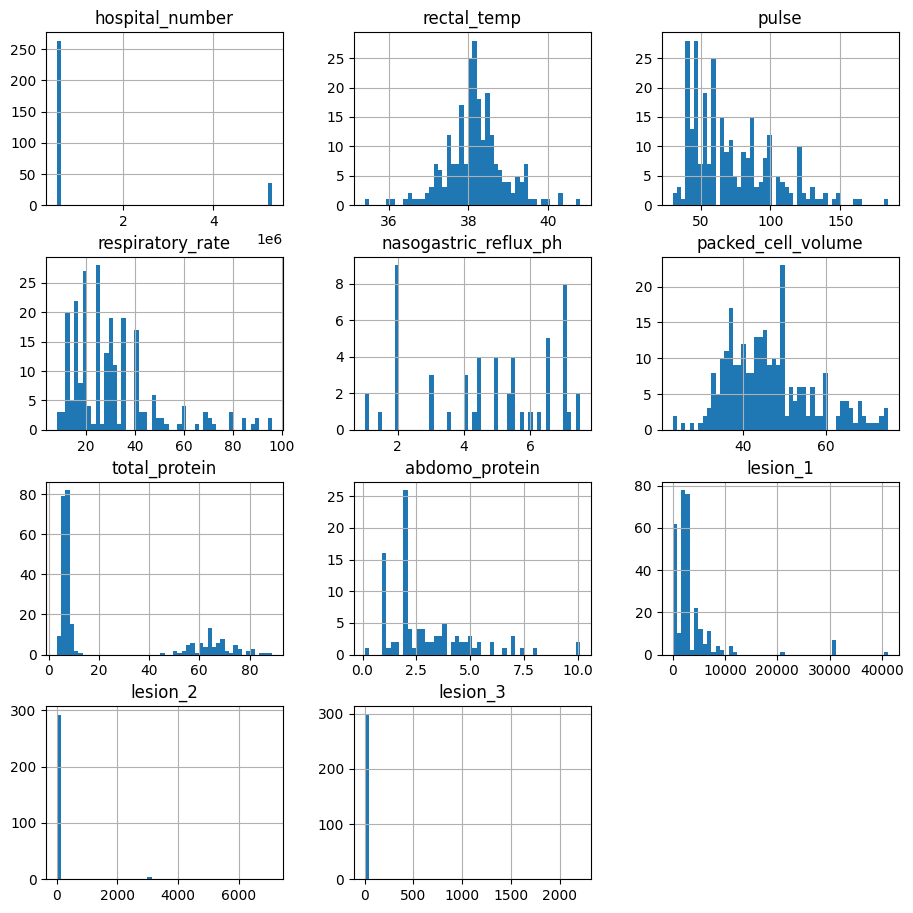

In [11]:
# Look at the distribution of the data
fig, ax = plt.subplots(figsize = (11,11))
df_train.hist(bins=50, ax=ax)
plt.show()

Based on the histograms above we can see that there is not alot data in lesion_1, lesion_2, lesion_3 and hospital number so they may be unnecessary and will be deleted.

#**Preprocessing**

---




Preprocessing is a crucial step in preparing the data for machine learning or data analysis tasks. It involves various techniques to ensure that the data is in a suitable format for modeling. The techniques used in this project follows:

1. **Handling Missing Data**

2. **Encoding Categorical Variables**:

3. **Feature Scaling**:

6. **Feature Selection**:

7. **Handling Imbalanced Data**:


##**Handling Missing Data:**













In [ ]:
df_train.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

<Axes: >

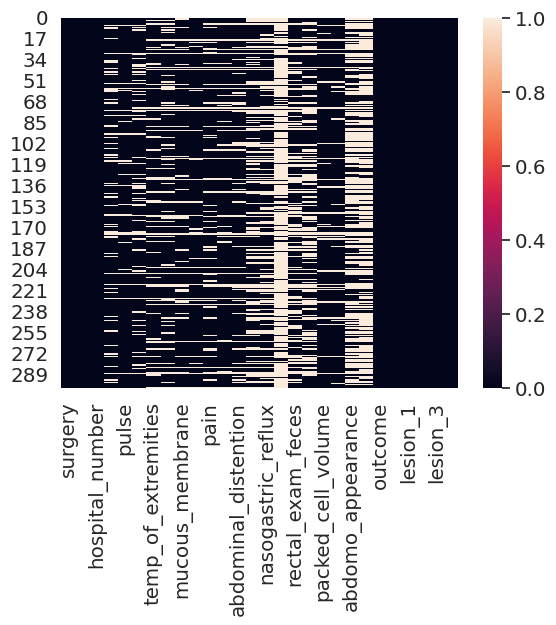

In [ ]:

sns.heatmap(df_train.isnull()) #show where ther are missing values

<Axes: >

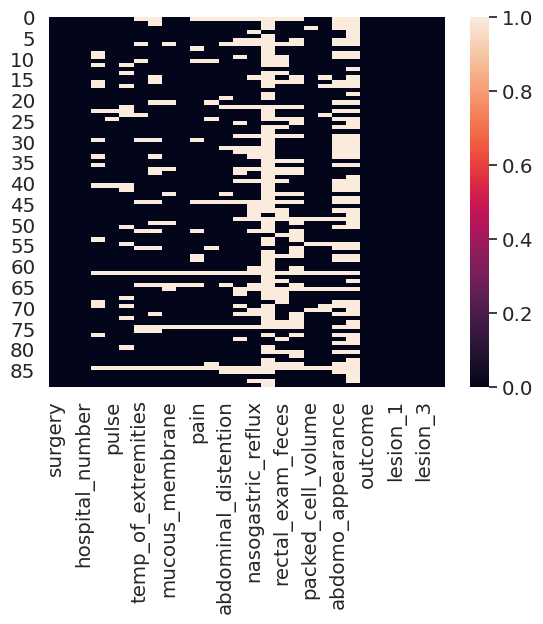

In [ ]:
# does the test data have missing values?
sns.heatmap(df_test.isnull()) #show where ther are missing values

##**Removing the unwanted columns**

The following columns will be removed:
1. the columns "nasogastric_reflux_ph", "abdomo_protein" and "abdomo_appearance " are the top 3 features with the most missing values<br>
2. The columns "hospital_number" and "cp_data" are not relevant to predict the outcomes <br>
3. 'lesion_1', 'lesion_2', and 'lesion_3' columns seems redudant because they have little no information which can be seen in the histogram above

In [91]:
cols_drop = ['nasogastric_reflux_ph', 'abdomo_appearance',
              'abdomo_protein', 'hospital_number', 'cp_data',
              'lesion_1', 'lesion_2', 'lesion_3' ]
df_clean= df_train.drop(cols_drop, axis=1)
dftest_clean= df_test.drop(cols_drop, axis=1)

<Axes: >

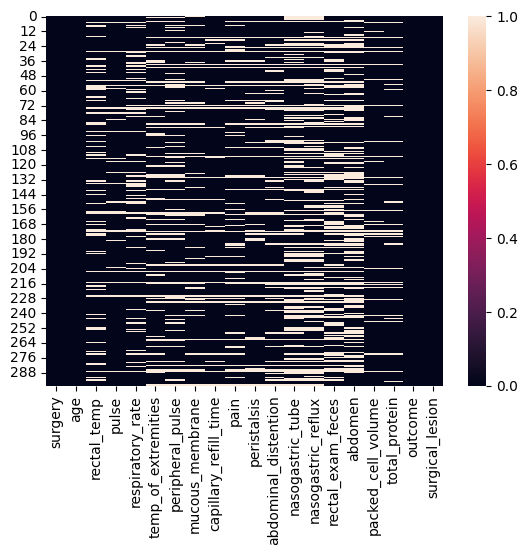

In [13]:
sns.heatmap(df_clean.isnull())

<Axes: >

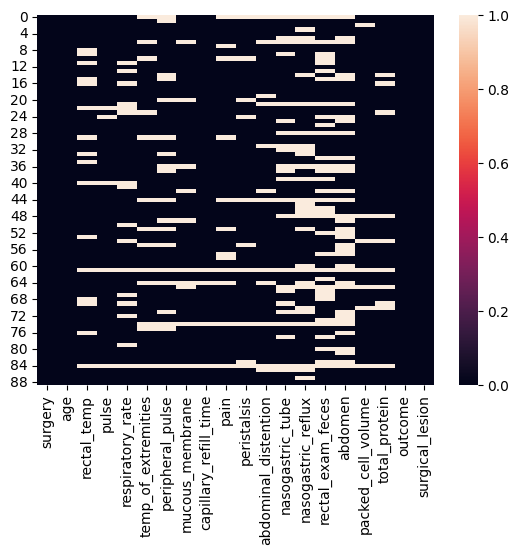

In [14]:
sns.heatmap(dftest_clean.isnull())

In [92]:
# Fill in missing numeric values with the mean value
cols_2 = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']
#training data
for col in cols_2:
    df_clean[col].fillna(df_clean[col].mean(), inplace = True)
#test data
for col in cols_2:
    dftest_clean[col].fillna(dftest_clean[col].mean(), inplace = True)

<Axes: >

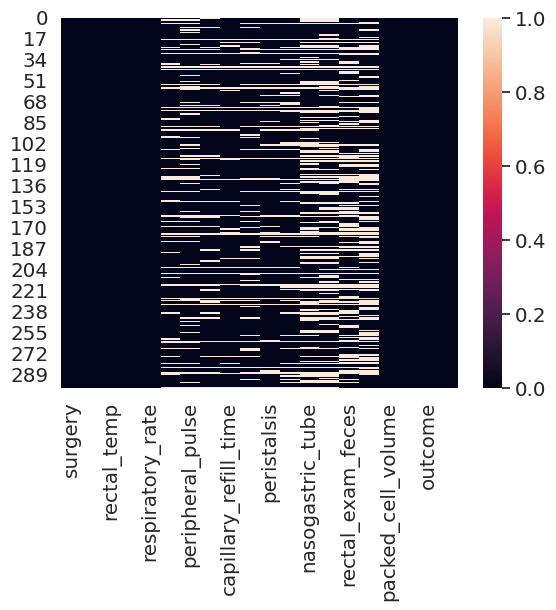

In [ ]:
sns.heatmap(df_clean.isnull())

##**Encoding Categorical Variables:**

In [93]:
# One-hot encode
cols = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
                  'capillary_refill_time', 'peristalsis', 'abdominal_distention',
                  'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen',
                  'pain', 'surgical_lesion']



for col in cols:
    df_clean = pd.concat([df_clean, pd.get_dummies(df_clean[col], prefix=col)], axis=1)
    df_clean.drop([col], axis=1, inplace=True)

# One-hot encode columns in dftest_clean
for col2 in cols:
    dftest_clean = pd.concat([dftest_clean, pd.get_dummies(dftest_clean[col2], prefix=col2)], axis=1)
    dftest_clean.drop([col2], axis=1, inplace=True)


<Axes: >

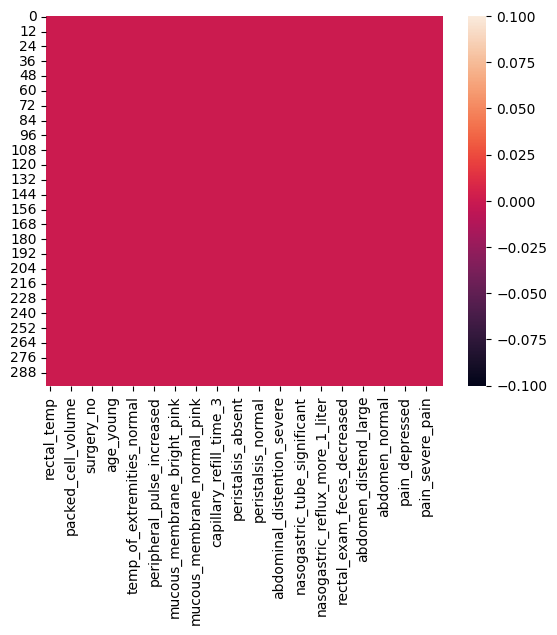

In [17]:
sns.heatmap(df_clean.isnull()) #We have treated all missing values

<Axes: >

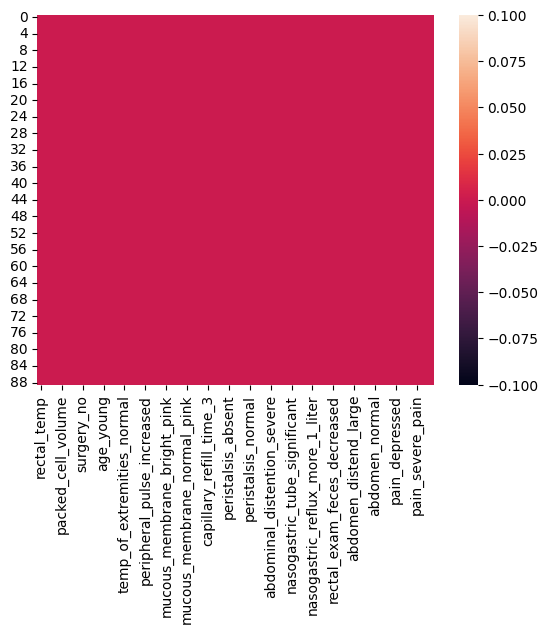

In [18]:
sns.heatmap(dftest_clean.isnull()) #We have treated all missing values

In [19]:

print(df_clean.shape)


(299, 57)


In [20]:
dftest_clean.shape

(89, 57)

the data is already split, just put them in their respective axis

In [21]:

#seperate the dataframe into x and y


In [94]:
X_train = df_clean.drop(columns=['outcome'])
y_train = df_clean['outcome']

X_test =dftest_clean.drop(columns=['outcome'])
y_test = dftest_clean['outcome']

In [95]:
#check is the columns are the same in both X_train and X_test so there are no errors
print("X_train columns:", X_train.columns.tolist())
print("X_test columns:", X_test.columns.tolist())

X_train columns: ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'surgery_no', 'surgery_yes', 'age_adult', 'age_young', 'temp_of_extremities_cold', 'temp_of_extremities_cool', 'temp_of_extremities_normal', 'temp_of_extremities_warm', 'peripheral_pulse_absent', 'peripheral_pulse_increased', 'peripheral_pulse_normal', 'peripheral_pulse_reduced', 'mucous_membrane_bright_pink', 'mucous_membrane_bright_red', 'mucous_membrane_dark_cyanotic', 'mucous_membrane_normal_pink', 'mucous_membrane_pale_cyanotic', 'mucous_membrane_pale_pink', 'capillary_refill_time_3', 'capillary_refill_time_less_3_sec', 'capillary_refill_time_more_3_sec', 'peristalsis_absent', 'peristalsis_hypermotile', 'peristalsis_hypomotile', 'peristalsis_normal', 'abdominal_distention_moderate', 'abdominal_distention_none', 'abdominal_distention_severe', 'abdominal_distention_slight', 'nasogastric_tube_none', 'nasogastric_tube_significant', 'nasogastric_tube_slight', 'nasogastric_reflux_less_1_

In [96]:
#checking if the "outcome" column was deleted in X_train
if "outcome" in X_train.columns:
    print("The outcome column is still here.")
else:
    print("The outcome column was deleted.")

The outcome column was deleted.


## **Feature Scaling**


In [97]:
from sklearn.preprocessing import StandardScaler
#  Instantiate the StandardScaler
scaler = StandardScaler()

In [98]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Models**

## **Decision Tree**

In [99]:
dt_model = DecisionTreeClassifier( max_depth = 5)

#  Train the model using the scaled training data
dt_model.fit(X_train_scaled, y_train)

#  Make predictions on the scaled test data
y_pred = dt_model.predict(X_test_scaled)



In [100]:
#hyperparameters selection
# Define the parameter grid with max depth values to search through
param_grid = {'max_depth': [None , 4, 5, 10, 15, 20]}
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
# Get the best max depth from the search results
best_max_depth = grid_search.best_params_['max_depth']
print("Best Max Depth:", best_max_depth)

Best Max Depth: 5


In [102]:
# Evaluate the model's performance on the test data
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average=None)
recall_dt = recall_score(y_test, y_pred, average=None)
f1_dt = f1_score(y_test, y_pred,average="weighted")

The accuracy score is: 0.8651685393258427 and the f1 score is 0.8614479248820028


              precision    recall  f1-score   support

        died       0.84      0.70      0.76        23
  euthanized       1.00      0.77      0.87        13
       lived       0.85      0.96      0.90        53

    accuracy                           0.87        89
   macro avg       0.90      0.81      0.84        89
weighted avg       0.87      0.87      0.86        89



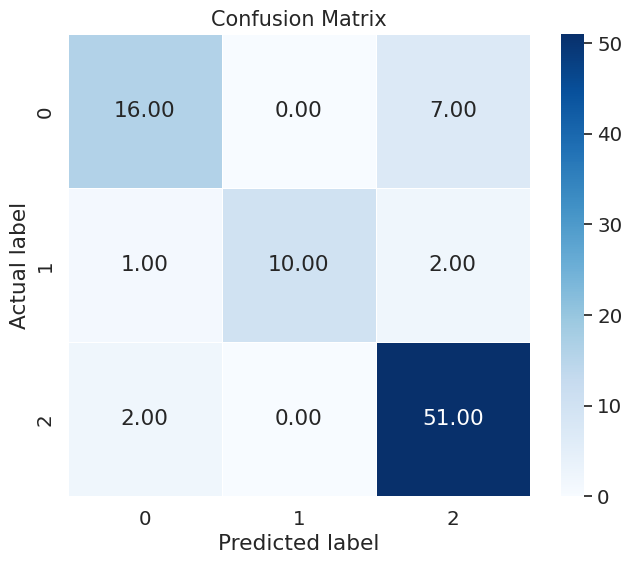

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
print(f'The accuracy score is: {accuracy_dt} and the f1 score is {f1_dt}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [ ]:
## choose the correct max depth on the decision tree

## **Random Forest classifier**

In [106]:
from sklearn import ensemble
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
#Train the model using the scaled training data
rf_model.fit(X_train_scaled, y_train)
#Make predictions on the scaled test data
y_pred = rf_model.predict(X_test_scaled)

In [107]:
# Evaluate the model's performance on the test data
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average=None)
recall_rf = recall_score(y_test, y_pred, average=None)
f1_rf = f1_score(y_test, y_pred,average="weighted")

The accuracy score is: 1.0 and the f1 score is 1.0


              precision    recall  f1-score   support

        died       1.00      1.00      1.00        23
  euthanized       1.00      1.00      1.00        13
       lived       1.00      1.00      1.00        53

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



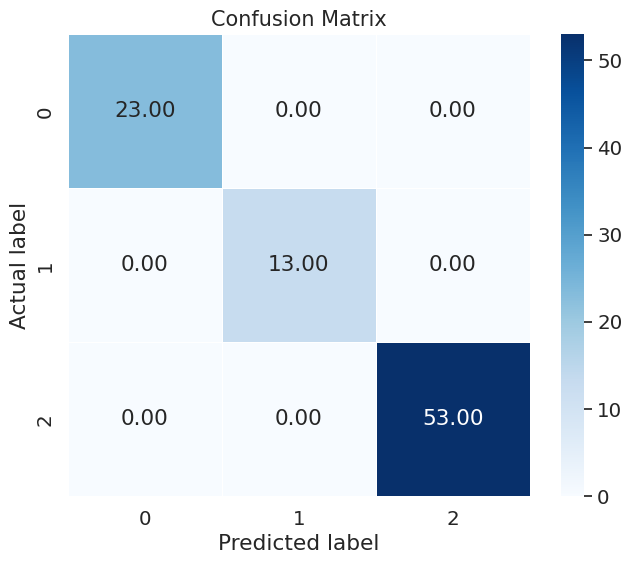

In [108]:
print(f'The accuracy score is: {accuracy_rf} and the f1 score is {f1_rf}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

## **Gradient boosting Classifier**

In [110]:
#Gradient boosting classifier
gb_model = ensemble.GradientBoostingClassifier()
#  Train the model using the scaled training data
gb_model.fit(X_train_scaled, y_train)
#  Make predictions on the scaled test data
y_pred = gb_model.predict(X_test_scaled)

In [111]:
# Evaluate the model's performance on the test data
accuracy_gb = accuracy_score(y_test, y_pred)
precision_gb = precision_score(y_test, y_pred,average=None)
recall_gb= recall_score(y_test, y_pred,average=None)
f1_gb = f1_score(y_test, y_pred,average="weighted")

The accuracy score is: 0.9887640449438202 and the f1 score is 0.9888300718327016


              precision    recall  f1-score   support

        died       0.96      1.00      0.98        23
  euthanized       1.00      1.00      1.00        13
       lived       1.00      0.98      0.99        53

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



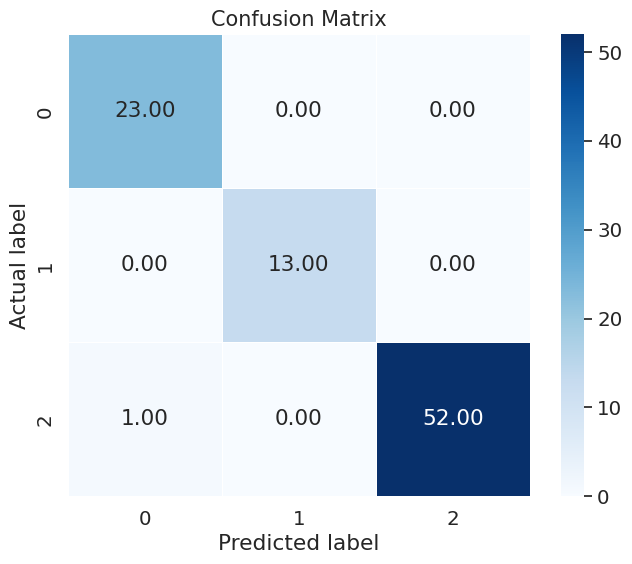

In [112]:
print(f'The accuracy score is: {accuracy_gb} and the f1 score is {f1_gb}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

## **Naive Bayes**

In [113]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
# Make predictions on the scaled test data
y_pred = nb_model.predict(X_test_scaled)

In [114]:
# Evaluate the model's performance on the test data
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average=None)
recall_nb= recall_score(y_test, y_pred, average=None)
f1_nb = f1_score(y_test, y_pred,average="weighted")


The accuracy score is: 0.5280898876404494 and the f1 score is 0.517611642220436


              precision    recall  f1-score   support

        died       0.40      1.00      0.57        23
  euthanized       0.45      0.38      0.42        13
       lived       0.95      0.36      0.52        53

    accuracy                           0.53        89
   macro avg       0.60      0.58      0.50        89
weighted avg       0.73      0.53      0.52        89



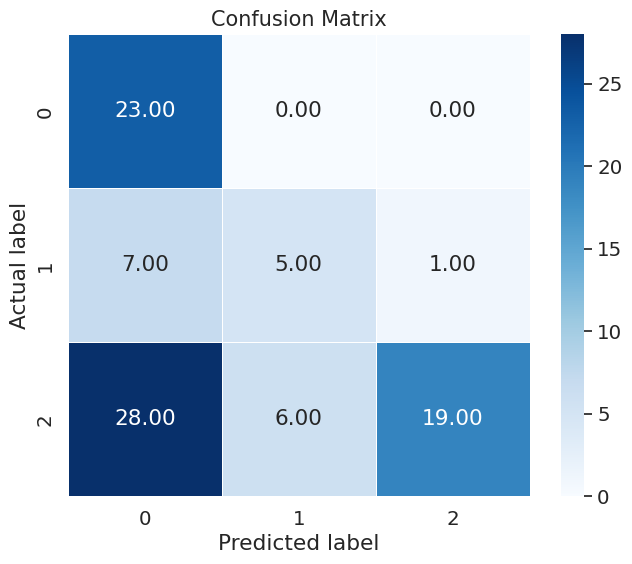

In [115]:
print(f'The accuracy score is: {accuracy_nb} and the f1 score is {f1_nb}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

## **Logistic Regression**

In [116]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
# Make predictions on the scaled test data
y_pred = lr_model.predict(X_test_scaled)



In [117]:
# Evaluate the model's performance on the test data
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average=None)
recall_lr = recall_score(y_test, y_pred, average=None)
f1_lr = f1_score(y_test, y_pred,average="weighted")

The accuracy score is: 0.8539325842696629 and the f1 score is 0.8468454965260384


              precision    recall  f1-score   support

        died       0.90      0.78      0.84        23
  euthanized       0.78      0.54      0.64        13
       lived       0.85      0.96      0.90        53

    accuracy                           0.85        89
   macro avg       0.84      0.76      0.79        89
weighted avg       0.85      0.85      0.85        89



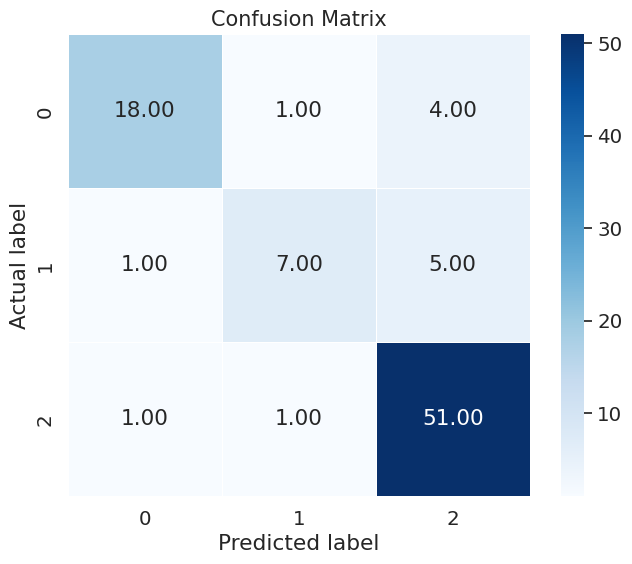

In [118]:
print(f'The accuracy score is: {accuracy_lr} and the f1 score is {f1_lr}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

## **SVM**

In [119]:
from sklearn.svm import SVC
sv_model = SVC(probability=True, kernel ='linear')
sv_model.fit(X_train_scaled, y_train)
#  Make predictions on the scaled test data
y_pred = sv_model.predict(X_test_scaled)



In [120]:
# Evaluate the model's performance on the test data
accuracy_sv = accuracy_score(y_test, y_pred)
precision_sv = precision_score(y_test, y_pred, average=None)
recall_sv = recall_score(y_test, y_pred, average=None)
f1_sv = f1_score(y_test, y_pred,average="weighted")


The accuracy score is: 0.8651685393258427 and the f1 score is 0.8569557192265649


              precision    recall  f1-score   support

        died       0.86      0.78      0.82        23
  euthanized       1.00      0.54      0.70        13
       lived       0.85      0.98      0.91        53

    accuracy                           0.87        89
   macro avg       0.90      0.77      0.81        89
weighted avg       0.88      0.87      0.86        89



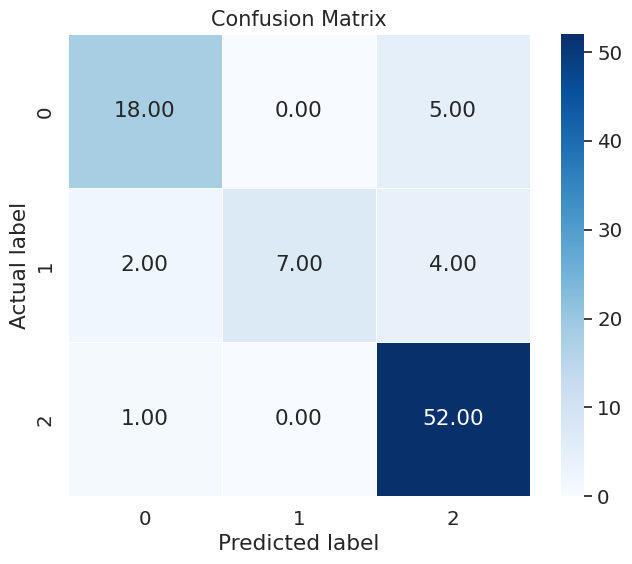

In [121]:
print(f'The accuracy score is: {accuracy_sv} and the f1 score is {f1_sv}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

## **KNN**

In [122]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(X_train_scaled, y_train)
#  Make predictions on the scaled test data
y_pred = kn_model.predict(X_test_scaled)


In [123]:
#  Evaluate the model's performance on the test data
accuracy_kn = accuracy_score(y_test, y_pred)
precision_kn = precision_score(y_test, y_pred, average=None)
recall_kn = recall_score(y_test, y_pred, average=None)
f1_kn= f1_score(y_test, y_pred,average="weighted")

The accuracy score is: 0.7528089887640449 and the f1 score is 0.7373915858478223


              precision    recall  f1-score   support

        died       0.58      0.65      0.61        23
  euthanized       1.00      0.31      0.47        13
       lived       0.81      0.91      0.86        53

    accuracy                           0.75        89
   macro avg       0.80      0.62      0.65        89
weighted avg       0.78      0.75      0.74        89



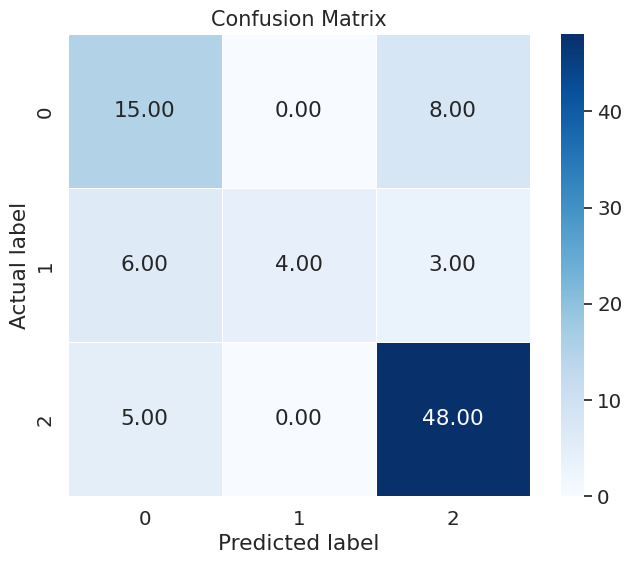

In [124]:
print(f'The accuracy score is: {accuracy_kn} and the f1 score is {f1_kn}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

##**Compare the Models**

###**Accuracy**
Random forest had the best outcome for accuracy

In [125]:
print(" Accuracies of each model:")
print("decision tree Accuracy:", accuracy_dt)
print("random forest Accuracy:", accuracy_rf)
print("gradient boosting  Accuracy:", accuracy_gb)
print("naive bayes Accuracy:", accuracy_nb)
print("logistic regrrssion Accuracy:", accuracy_lr)
print("SVM Accuracy:", accuracy_sv)
print("K-nearest neighbour Accuracy:", accuracy_kn)


 Accuracies of each model:
decision tree Accuracy: 0.8651685393258427
random forest Accuracy: 1.0
gradient boosting  Accuracy: 0.9887640449438202
naive bayes Accuracy: 0.5280898876404494
logistic regrrssion Accuracy: 0.8539325842696629
SVM Accuracy: 0.8651685393258427
K-nearest neighbour Accuracy: 0.7528089887640449


###**Precision**

Random forest had the best results for the precision

In [126]:
print(" Precision of each model:")
print("Decision tree Precision:", precision_dt)
print("Random forest Precision:", precision_rf)
print("gradient boosting  Precision:", precision_gb)
print("naive bayes Precision:", precision_nb)
print("logistic regression Precision:", precision_lr)
print("SVM Precision:", precision_sv)
print("K-nearest neighbour precision:", accuracy_kn)


 Precision of each model:
Decision tree Precision: [0.84210526 1.         0.85      ]
Random forest Precision: [1. 1. 1.]
gradient boosting  Precision: [0.95833333 1.         1.        ]
naive bayes Precision: [0.39655172 0.45454545 0.95      ]
logistic regression Precision: [0.9        0.77777778 0.85      ]
SVM Precision: [0.85714286 1.         0.85245902]
K-nearest neighbour precision: 0.7528089887640449


 ### **Recall**

 Random forest had the best results for recall

In [127]:
print(" Recall of each model:")
print("Decision tree Recall:", recall_dt)
print("Random forest Recall:", recall_rf)
print("gradient boosting  Recall:", recall_gb)
print("naive bayes Recall:", recall_nb)
print("logistic regression Recall:", recall_lr)
print("SVM Recall:", recall_sv)
print("K-nearest neighbour Recall:", recall_kn)

 Recall of each model:
Decision tree Recall: [0.69565217 0.76923077 0.96226415]
Random forest Recall: [1. 1. 1.]
gradient boosting  Recall: [1.         1.         0.98113208]
naive bayes Recall: [1.         0.38461538 0.35849057]
logistic regression Recall: [0.7826087  0.53846154 0.96226415]
SVM Recall: [0.7826087  0.53846154 0.98113208]
K-nearest neighbour Recall: [0.65217391 0.30769231 0.90566038]


## **F1 Score**

random forest had the best f1 score

In [128]:
print(" f1 of each model:")
print("Decision tree f1:", f1_dt)
print("Random forest f1:", f1_rf)
print("gradient boosting  f1:", f1_gb)
print("naive bayes f1:", f1_nb)
print("logistic regression f1:", f1_lr)
print("SVM f1:", f1_sv)
print("K-nearest neighbour f1:", f1_kn)

 f1 of each model:
Decision tree f1: 0.8614479248820028
Random forest f1: 1.0
gradient boosting  f1: 0.9888300718327016
naive bayes f1: 0.517611642220436
logistic regression f1: 0.8468454965260384
SVM f1: 0.8569557192265649
K-nearest neighbour f1: 0.7373915858478223


# **Model evaluation**

In [133]:
r_probs = [0 for _ in range (len(y_test))]
rf_probs = rf_model.predict_proba(X_test)
nb_probs = nb_model.predict_proba(X_test)
dt_probs = dt_model.predict_proba(X_test)
gb_probs = gb_model.predict_proba(X_test)
knn_probs = kn_model.predict_proba(X_test)
lr_probs = lr_model.predict_proba(X_test)
sv_probs = sv_model.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names

##**ROC/AUC**
i will also use this the evaluate the models because the data is imbalances

In [134]:
rf_probs = rf_probs.reshape(-1, 1)
nb_probs = nb_probs.reshape(-1, 1)
dt_probs = dt_probs.reshape(-1, 1)
gb_probs = gb_probs.reshape(-1, 1)
lr_probs = lr_probs.reshape(-1, 1)
sv_probs = sv_probs.reshape(-1, 1)

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score
y_test = np.argmax(y_test, axis=0)
r_auc = roc_auc_score(y_test, r_probs, multi_class='ovr')
rf_auc = roc_auc_score(y_test, rf_probs, multi_class='ovr')
nb_auc = roc_auc_score(y_test, nb_probs,multi_class='ovr')
dt_auc = roc_auc_score(y_test, dt_probs, multi_class='ovr')
gb_auc = roc_auc_score(y_test, gb_probs, multi_class='ovr')
knn_auc = roc_auc_score(y_test, knn_probs, multi_class='ovr')
lr_auc = roc_auc_score(y_test, lr_probs, multi_class='ovr')
sv_auc = roc_auc_score(y_test, sv_probs, multi_class='ovr')


TypeError: ignored

In [ ]:

print('random prediction : auc roc = %.3f'%(r_auc))
print('random fores prediction : auc roc = %.3f'%(rf_auc))
print('naive bayes prediction : auc roc = %.3f'%(nb_auc))
print('decision treee prediction : auc roc = %.3f'%(dt_auc))
print('gradient boost prediction : auc roc = %.3f'%(gb_auc))
print('knn prediction : auc roc = %.3f'%(knn_auc))
print('linear regression prediction : auc roc = %.3f'%(lr_auc))
print('SVM prediction : auc roc = %.3f'%(sv_auc))

# **Feature selection**

In [131]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

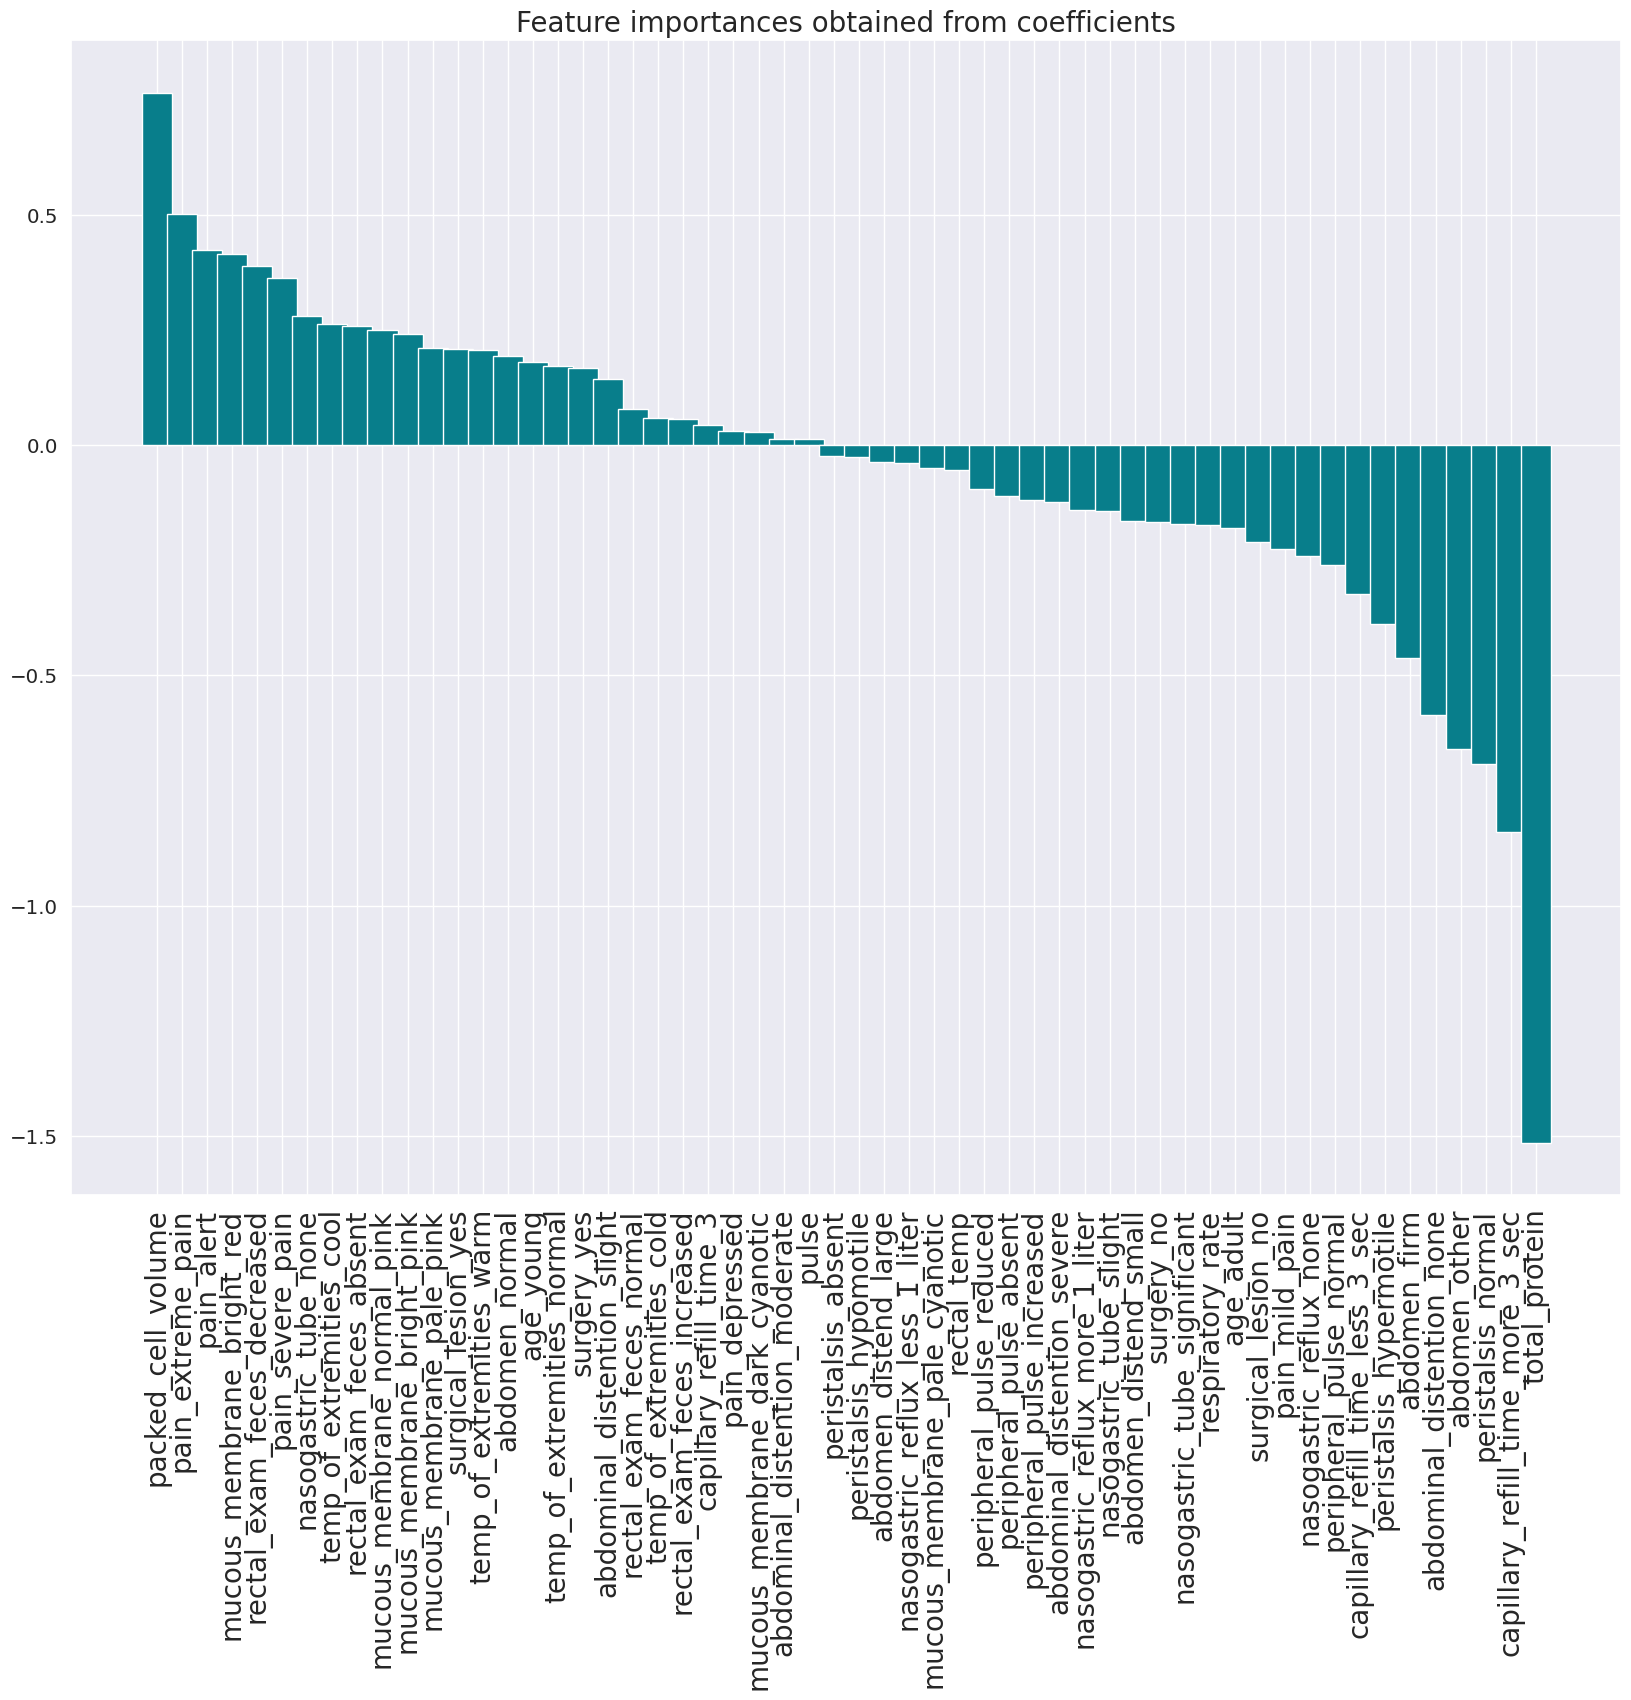

In [132]:
plt.figure(figsize=(20, 15))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B', width=1.2)
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical',fontsize=20)

plt.show()

The following columns seem like they dont have much importance in determining the outcome : pulse, peristalsis_absent, abdominal_distention_moderate, mucous_membrane_dark_cyanotic, pain_depressed, capillary_refill_time_3, peristalsis_hypomotile, abdomen_Destend_large, masogastric_reflux_less_I_liter

## **Lets balance the data**

###Up Sampling

Name: Ashley Williams <br>
Contact: https://www.linkedin.com/in/ashleyvanessawilliams/ <br>
University :Pontifícia Universidade Católica do Rio de Janeiro (PUC-Rio)<br>
Course: Data Mining <br>
Professor: <br>